In [45]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


<AxesSubplot:>

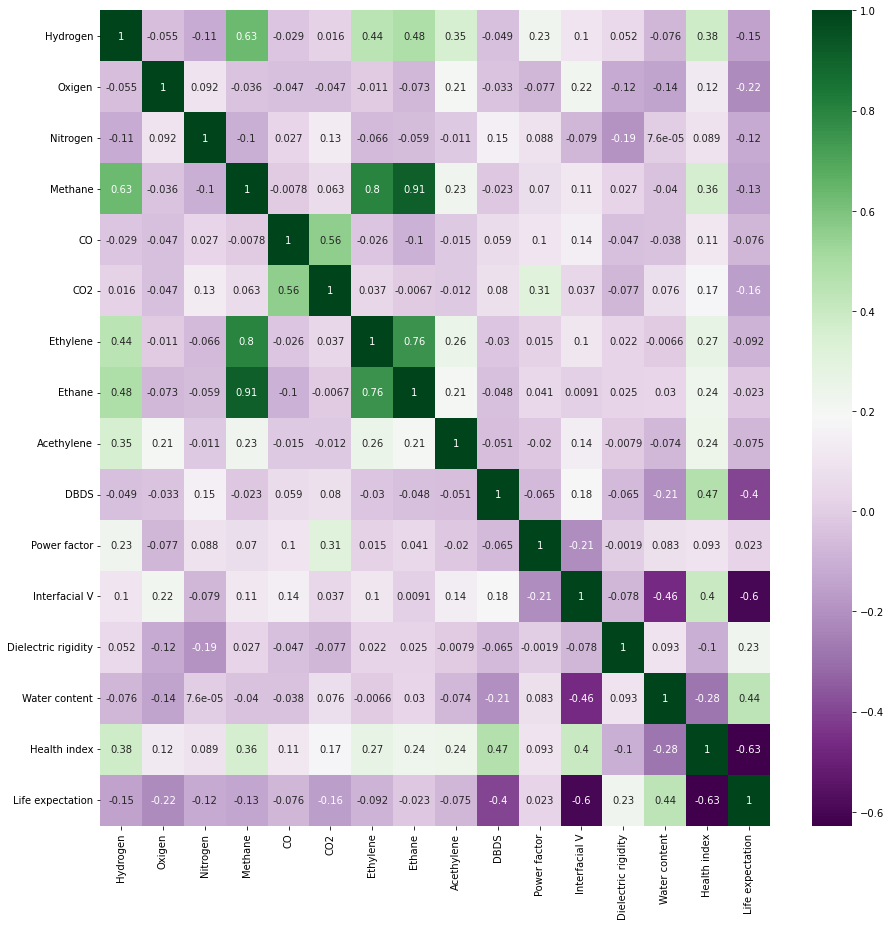

In [90]:
df=pd.read_csv("Health index1.csv")

df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot =True,cmap="PRGn")

In [92]:
df.drop(["Ethane","Methane"],axis=1,inplace=True)


df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   CO                   470 non-null    int64  
 4   CO2                  470 non-null    int64  
 5   Ethylene             470 non-null    int64  
 6   Acethylene           470 non-null    int64  
 7   DBDS                 470 non-null    float64
 8   Power factor         470 non-null    float64
 9   Interfacial V        470 non-null    int64  
 10  Dielectric rigidity  470 non-null    int64  
 11  Water content        470 non-null    int64  
 12  Health index         470 non-null    float64
 13  Life expectation     470 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 51.5 KB


,Hydrogen,Oxigen,Nitrogen,CO,CO2,Ethylene,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,244.000000,1816.414894,162.923404,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043,33.010426
std,2002.142678,14164.233283,13760.451816,237.267485,2256.790519,1323.811504,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458,17.791047
min,0.000000,57.000000,3600.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000,6.000000
25%,4.000000,496.000000,41700.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000,19.000000
50%,9.000000,3810.000000,49100.000000,150.500000,1125.000000,3.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000,32.000000
75%,34.000000,14875.000000,55875.000000,361.750000,2257.500000,6.000000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000,51.000000
max,23349.000000,249900.000000,85300.000000,1730.000000,24900.000000,16684.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000,51.000000


<AxesSubplot:>

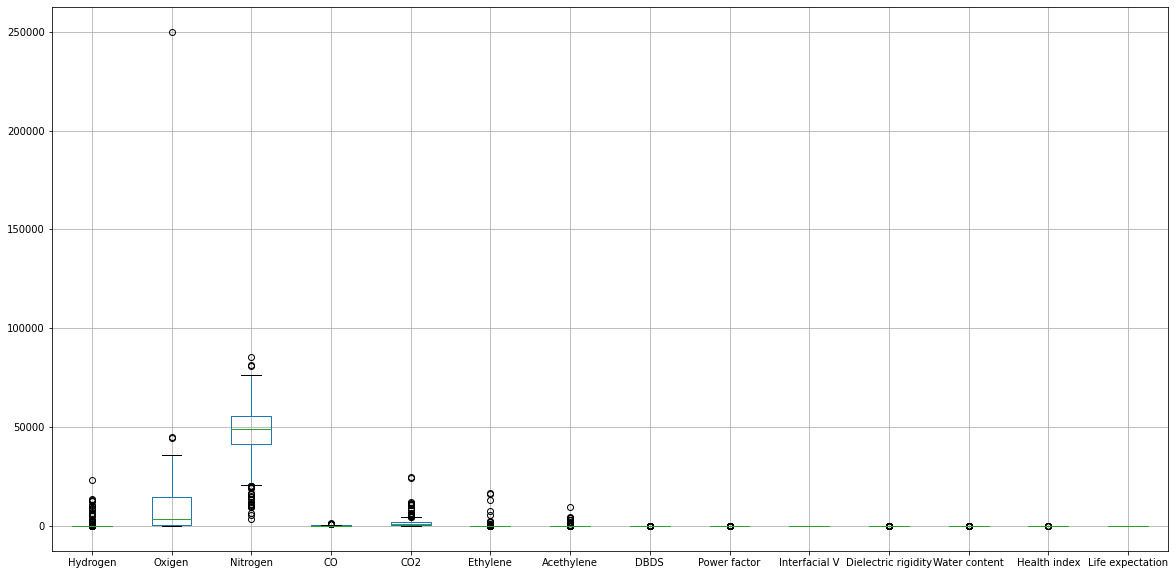

In [100]:

plt.figure(figsize=(20,10))
df.boxplot()

In [19]:
from sklearn.model_selection import train_test_split

x=df.drop('Life expectation',axis=1)
y=df['Life expectation']

In [59]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)


In [60]:



l_m =LinearRegression()

In [101]:
model =l_m.fit(x_train,y_train)

In [72]:
y_pred =model.predict(x_train)

In [73]:
y_pred

array([40.7155335 , 46.68390521,  2.90991743, 54.49190962, 21.28691988,
       48.3190864 , 15.74257434, 48.58746242, 48.46805587, 12.55675336,
       21.84043404, 46.25540054, 50.27217786,  6.08643463, 36.76893894,
       14.06396468, 25.66289438, 19.70184767, 37.57389941, 18.5967879 ,
       43.81939895, 51.78279662, 41.65138006, 49.72670069, 10.71064294,
       61.69336681, 49.03341676, 47.3096631 , 30.90234136, 42.66164235,
       41.96786314, 14.217049  , 46.7952145 , 16.41488998, 10.93707017,
       24.96791958,  3.0337494 , 21.48988682, 43.60677808, 36.83612455,
        8.23913223, 38.01509839, 19.06748368, 13.16626422, 32.12848747,
       49.1499596 , 22.65862926, 25.15422468, 49.85160008, 14.28630758,
       16.33862721, 24.60074841, 11.8709122 , 49.19406274, 29.90716366,
       24.11742166, 24.78392447, 50.96277934, 36.06552374, 29.30018023,
       37.66841148, 51.36825259, 25.43233476, 50.3346815 , 45.64943649,
       33.3822917 , 23.77230838, 35.9894543 , 49.36975639, 46.55

In [78]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_train,y_pred)
mse

124.56345480756998

In [75]:
rq = r2_score(y_train,y_pred)
rq

0.6146394210356085

In [82]:
import pickle
with open('mfile.pkl','wb') as file:
    pickle.dump(model,file)

file.close

<function BufferedWriter.close>

In [102]:
file = open("mfile.pkl",'rb')

var_model = pickle.load(file)

file.close()
print(var_model)

LinearRegression()
